In [1]:
# This compares our and Robospect's methods for generating EW errors on CaIIK
# (This is important since we do the model fits using those errors)

# Created 2020 Apr. 24 by E.S.

In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib qt

In [2]:
# read in scraped output
df = pd.read_csv("data/McD_largeTable_bad_spectra_removed_test_20200414.csv")

In [3]:
# choose CaIIK
df2 = df.where(df["line_name"] == "CaIIK").dropna()

In [4]:
# make df of all temperatures
temp_array_nonredun = df["original_spec_file_name"].dropna().str.slice(start=0, stop=4).drop_duplicates().values
df["Teff"] = df["original_spec_file_name"].dropna().str.slice(start=0, stop=4)

# make df of all loggs
logg_array_nonredun = df["original_spec_file_name"].dropna().str.slice(start=4, stop=6).drop_duplicates().values
df["logg"] = df["original_spec_file_name"].dropna().str.slice(start=4, stop=6)

# make df of all Fe/H
feh_array_nonredun = df["original_spec_file_name"].dropna().str.slice(start=6, stop=9).drop_duplicates().values
df["feh"] = df["original_spec_file_name"].dropna().str.slice(start=6, stop=9)

# make df of all empirical spectra
original_spec_name_nonredun = df["original_spec_file_name"].dropna().drop_duplicates().values

In [ ]:
# histograms of the errors are grouped by temperatures and abundances. 
# RW: For 3 values of logg, there should be 300 realizations; 10 or so should be `whacked'. 

# make bin size 0.01
bins_list = np.arange(0,100,step=0.01)

plt.clf()
for i in range(0,2):

    '''
    # by Teff
    plt.title("Robospect error in EW by Teff")
    plt.hist(df["uncertaintyEQW"].where(df["Teff"] == temp_array_nonredun[i]), bins = bins_list, 
             alpha=0.5, label=str(temp_array_nonredun[i]))
    print(len(df["uncertaintyEQW"].where(df["Teff"] == temp_array_nonredun[i]).dropna()))
    print(np.max(df["uncertaintyEQW"].where(df["Teff"] == temp_array_nonredun[i]).dropna()))
    '''
    
    '''
    # by logg
    plt.title("Robospect error in EW by logg")
    plt.hist(df["uncertaintyEQW"].where(df["logg"] == logg_array_nonredun[i]), bins = bins_list, 
             alpha=0.5, label=str(logg_array_nonredun[i]))
    print(len(df["uncertaintyEQW"].where(df["logg"] == logg_array_nonredun[i]).dropna()))
    print(np.max(df["uncertaintyEQW"].where(df["logg"] == logg_array_nonredun[i]).dropna()))
    '''
    
    '''
    # by Fe/H
    plt.title("Robospect error in EW by Fe/H")
    plt.hist(df["uncertaintyEQW"].where(df["feh"] == feh_array_nonredun[i]), bins = bins_list, 
             alpha=0.5, label=str(feh_array_nonredun[i]))
    print(len(df["uncertaintyEQW"].where(df["feh"] == feh_array_nonredun[i]).dropna()))
    print(np.max(df["uncertaintyEQW"].where(df["feh"] == feh_array_nonredun[i]).dropna()))
    '''
    
    
#plt.xlim([0,0.15])
plt.legend()
plt.xlabel("EW (angstr)")
plt.ylabel("Number")

plt.savefig("junk.pdf")

'''
plt.clf()
for i in range(len(temp_array[4:])):
    plt.hist(df["uncertaintyEQW"].where(df["Teff"] == temp_array[i]), bins = bins_list, label=str(temp_array[i]))
plt.xlim([0,0.15])
plt.legend()
plt.title("Error in EW")
plt.show()
'''

9500
13.100351
11000
364.386094


'\nplt.clf()\nfor i in range(len(temp_array[4:])):\n    plt.hist(df["uncertaintyEQW"].where(df["Teff"] == temp_array[i]), bins = bins_list, label=str(temp_array[i]))\nplt.xlim([0,0.15])\nplt.legend()\nplt.title("Error in EW")\nplt.show()\n'

In [5]:
df_caiik = df.where(df["line_name"] == "CaIIK")

In [40]:
df_caiik.keys()

Index(['Unnamed: 0', '#x0', '[1', 'mean', 'gaussianSigma', 'gaussianAmp', '[2',
       'uncertaintyMu', 'uncertaintySigma', 'uncertaintyAmp', '[3', 'priorMu',
       'priorSigma', 'priorAmp', 'EQW', 'uncertaintyEQW', 'chiSqr', 'flags',
       'blendGroup', 'line_name', 'robolines_file_name',
       'realization_spec_file_name', 'original_spec_file_name', 'Teff', 'logg',
       'feh'],
      dtype='object')

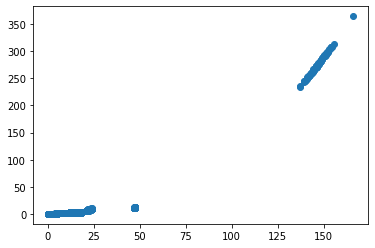

In [28]:
plt.scatter(df_caiik["EQW"],df_caiik["uncertaintyEQW"])
#plt.xlim([0,25])
#plt.ylim([0,12])
plt.show()

In [5]:
def plot_loghist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

----
T=5750
feh=m10
300
0      2.510910
1      2.500634
2      2.536262
3      2.525915
4      2.681937
         ...   
295    2.533686
296    2.528103
297    2.537171
298    2.539748
299    2.536173
Name: uncertaintyEQW, Length: 300, dtype: float64
ew_err_teff_5750_feh_m10.pdf
----
T=5750
feh=m15
300
0      1.793739
1      1.795816
2      1.778761
3      1.801984
4      1.808704
         ...   
295    1.551799
296    1.556246
297    1.553698
298    1.555769
299    1.542392
Name: uncertaintyEQW, Length: 300, dtype: float64
ew_err_teff_5750_feh_m15.pdf
----
T=5750
feh=m20
300
0      1.023440
1      1.014100
2      1.021287
3      1.023266
4      1.029871
         ...   
295    0.889768
296    0.922852
297    0.872350
298    0.896954
299    0.881983
Name: uncertaintyEQW, Length: 300, dtype: float64
ew_err_teff_5750_feh_m20.pdf
----
T=5750
feh=m25
300
0      0.482442
1      0.501034
2      0.507400
3      0.503271
4      0.510110
         ...   
295    0.474441
296    0.484694
297    0.47

ew_err_teff_6500_feh_p02.pdf
----
T=6500
feh=m05
300
0      2.284946
1      2.279400
2      2.277969
3      2.287975
4      2.275023
         ...   
295    1.804106
296    1.794669
297    1.793305
298    1.790194
299    1.794381
Name: uncertaintyEQW, Length: 300, dtype: float64
ew_err_teff_6500_feh_m05.pdf
----
T=6500
feh=p00
300
0      2.834078
1      2.833244
2      2.874689
3      2.824807
4      2.847387
         ...   
295    2.524646
296    2.514843
297    2.524889
298    2.510452
299    2.525684
Name: uncertaintyEQW, Length: 300, dtype: float64
ew_err_teff_6500_feh_p00.pdf
----
T=6750
feh=m10
300
0      1.325317
1      1.330231
2      1.314544
3      1.319452
4      1.328530
         ...   
295    1.020670
296    1.024057
297    1.027599
298    1.029515
299    1.020021
Name: uncertaintyEQW, Length: 300, dtype: float64
ew_err_teff_6750_feh_m10.pdf
----
T=6750
feh=m15
300
0      0.636211
1      0.648309
2      0.645345
3      0.638463
4      0.638845
         ...   
295    0.45465

ew_err_teff_7500_feh_m25.pdf
----
T=7500
feh=m30
300
0      0.071620
1      0.074401
2      0.071920
3      0.068382
4      0.068789
         ...   
295    0.084185
296    0.084968
297    0.086818
298    0.080064
299    0.083215
Name: uncertaintyEQW, Length: 300, dtype: float64
ew_err_teff_7500_feh_m30.pdf
----
T=7500
feh=p02
300
0      1.732284
1      1.728369
2      1.725083
3      1.723276
4      1.728689
         ...   
295    1.011409
296    1.013484
297    1.002890
298    1.011995
299    1.007960
Name: uncertaintyEQW, Length: 300, dtype: float64
ew_err_teff_7500_feh_p02.pdf
----
T=7500
feh=m05
300
0      0.955533
1      0.967594
2      0.969875
3      0.963296
4      0.955867
         ...   
295    0.724212
296    0.719793
297    0.718870
298    0.720866
299    0.721801
Name: uncertaintyEQW, Length: 300, dtype: float64
ew_err_teff_7500_feh_m05.pdf
----
T=7500
feh=p00
300
0      1.508341
1      1.499713
2      1.501173
3      1.496407
4      1.502223
         ...   
295    0.95874

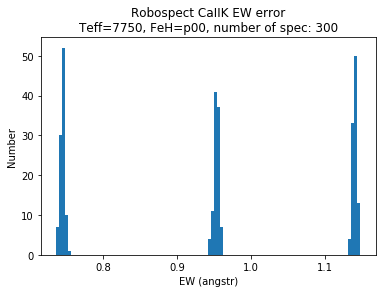

In [11]:
# Make histograms of EW err for a single combination of temp and logg

# make bin size 0.01
#bins_list = np.arange(0,12,step=0.1)


# loop over Teffs
for i in range(0,len(temp_array_nonredun)):
    
    # loop over FeHs
    for j in range(0,len(feh_array_nonredun)):
        
        df2 = df.where(np.logical_and(np.logical_and(df["Teff"] == temp_array_nonredun[i],
                                                        df["feh"] == feh_array_nonredun[j]),
                                      df["line_name"] == "CaIIK")).dropna().reset_index()
        print("----")
        print("T="+str(temp_array_nonredun[i]))
        print("feh="+str(feh_array_nonredun[j]))
        print(len(df2))
        print(df2["uncertaintyEQW"])

        '''
        # logarithmic
        plt.clf()
        plt.title("Robospect CaIIK EW error\nTeff="
                  +str(temp_array_nonredun[i])
                  +", FeH="+str(feh_array_nonredun[j])+", number of spec: "+str(len(df2)))
        plot_loghist(x=df2["uncertaintyEQW"], bins=80)
        plt.xlabel("Error in EW (angstr)")
        plt.ylabel("Number")
        plt.savefig("ew_err_teff_"+str(temp_array_nonredun[i])+"_feh_"+str(feh_array_nonredun[j])+".pdf")
        '''

        # linear
        plt.clf()
        plt.title("Robospect error in EW by Teff/FeH combination")
        plt.hist(df2["uncertaintyEQW"].where(
            np.logical_and(df2["Teff"] == temp_array_nonredun[i],df2["feh"] == feh_array_nonredun[j])), 
            bins = 100, 
            alpha=1, label=str(temp_array_nonredun[i]))
        plt.title("Robospect CaIIK EW error\nTeff="
                  +str(temp_array_nonredun[i])
                  +", FeH="+str(feh_array_nonredun[j])+", number of spec: "+str(len(df2)))
        plt.xlabel("EW (angstr)")
        plt.ylabel("Number")
        plt.savefig("ew_err_teff_"+str(temp_array_nonredun[i])+"_feh_"+str(feh_array_nonredun[j])+"_linear.pdf")
        print("ew_err_teff_"+str(temp_array_nonredun[i])+"_feh_"+str(feh_array_nonredun[j])+".pdf")

In [11]:
plt.hist(df["uncertaintyEQW"].where(df["Teff"] == temp_array[i]), bins = bins_list, label=str(temp_array[i]))

NameError: name 'temp_array' is not defined

In [12]:
bins_list

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [14]:
df_caiik = df.where(df["line_name"] == "CaIIK")

In [27]:
plt.hist(df2["EQW"], bins=300)
plt.xlim([0,25])
plt.title("Ca IIK EW")
plt.show()

In [28]:
plt.hist(df2["uncertaintyEQW"], bins=3000)
plt.xlim([0,5])
plt.title("Robospect err Ca IIK EW")
plt.show()

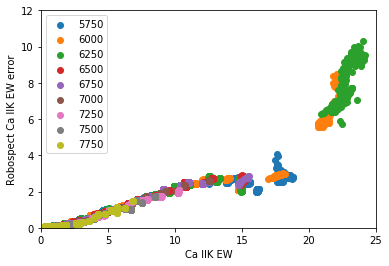

In [23]:
# plot errors by Teff

plt.clf()
for i in range(0,len(temp_array_nonredun)):

    # define df for this temp
    df_caiik_temp = df_caiik.where(df_caiik["Teff"] == temp_array_nonredun[i])

    plt.scatter(df_caiik_temp["EQW"],df_caiik_temp["uncertaintyEQW"],label=str(temp_array_nonredun[i]))

plt.legend()
plt.xlabel("Ca IIK EW")
plt.ylabel("Robospect Ca IIK EW error")
plt.xlim([0,25])
plt.ylim([0,12])
#plt.show()
plt.savefig("junk.pdf")

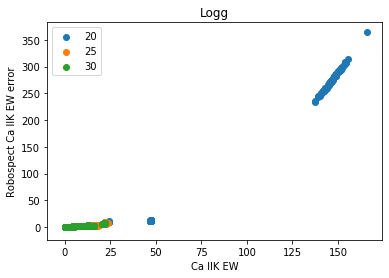

In [25]:
# plot errors by logg

plt.clf()
for i in range(0,len(logg_array_nonredun)):

    # define df for this temp
    df_caiik_logg = df_caiik.where(df_caiik["logg"] == logg_array_nonredun[i])

    plt.scatter(df_caiik_logg["EQW"],df_caiik_logg["uncertaintyEQW"],label=str(logg_array_nonredun[i]))

plt.legend()
plt.xlabel("Ca IIK EW")
plt.ylabel("Robospect Ca IIK EW error")
#plt.xlim([0,25])
#plt.ylim([0,12])
plt.title("Logg")
#plt.show()
plt.savefig("junk.pdf")

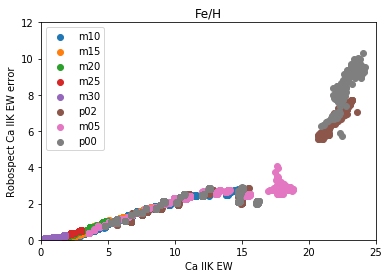

In [30]:
# plot errors by FeH

plt.clf()
for i in range(0,len(feh_array_nonredun)):

    # define df for this FeH
    df_caiik_feh = df_caiik.where(df_caiik["feh"] == feh_array_nonredun[i])

    plt.scatter(df_caiik_feh["EQW"],df_caiik_feh["uncertaintyEQW"],label=str(feh_array_nonredun[i]))

plt.legend()
plt.xlabel("Ca IIK EW")
plt.ylabel("Robospect Ca IIK EW error")
plt.xlim([0,25])
plt.ylim([0,12])
plt.title("Fe/H")
#plt.show()
plt.savefig("junk.pdf")

length:
207
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206


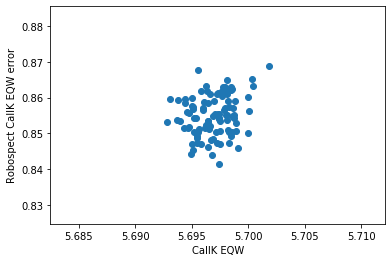

In [64]:
# make plot of error vs. EW for our OWN errors

# idea is to loop over all realizations corresponding to one 'empirical' spectrum
# and finding the errors like we do in our pipeline

# initialize arrays
ew_array = np.nan*np.ones(len(original_spec_name_nonredun))
err_ew_array = np.nan*np.ones(len(original_spec_name_nonredun))

print("length:")
print(str(len(original_spec_name_nonredun)))
for t in range(0,len(original_spec_name_nonredun)):
    print(t)
    
    # def
    df_caiik_this_orig_spec = df_caiik.where(df_caiik["original_spec_file_name"] == original_spec_name_nonredun[t]).dropna()
    
    # calculate our ew and error
    ew_caiik = np.median(df_caiik_this_orig_spec["EQW"])
    err_ew_caiik = np.std(df_caiik_this_orig_spec["EQW"])
    # add to arrays
    ew_array[t] = ew_caiik
    err_ew_array[t] = err_ew_caiik
    
    # also make a plot of EWs and errors
    plt.clf()
    plt.scatter(df_caiik_this_orig_spec["EQW"],df_caiik_this_orig_spec["uncertaintyEQW"])
    plt.xlabel("CaIIK EQW")
    plt.ylabel("Robospect CaIIK EQW error")
    plt.savefig("ew_error_single_empirical_spec_"+str(os.path.basename(original_spec_name_nonredun[t]))+".pdf")

In [49]:
err_ew_array

array([1.44543376e-01, 1.11740045e-02, 3.93195971e-03, 4.68221363e-03,
       4.06570961e-03, 1.24794799e-01, 3.70704961e-01, 6.58238219e-02,
       1.60362115e-02, 4.99169461e-03, 4.56945288e-03, 3.46703486e-03,
       9.45456413e-02, 4.84766794e-02, 1.43946887e-02, 5.92203277e-03,
       5.26092560e-03, 4.05414556e-03, 4.09914784e-02, 2.43620599e-01,
       1.54593883e-02, 7.77483854e-03, 3.70073582e-03, 3.13373827e-03,
       4.28607633e-03, 4.46685125e+00, 5.77939716e-02, 2.05627212e-02,
       7.52328767e-03, 6.14026382e-03, 3.35939581e-03, 3.76466944e-03,
       1.50800256e-01, 1.78725918e-02, 1.52436248e-02, 7.36719101e-03,
       5.33415563e-03, 4.57342826e-03, 3.36803398e-03, 3.39075471e-02,
       3.56730130e-01, 6.57807903e-02, 1.10897166e-02, 4.27922134e-03,
       2.76897615e-03, 3.18898423e-03, 3.08545951e-03, 7.69299821e-01,
       1.07644729e-02, 7.47067732e-03, 6.12827063e-03, 3.27933192e-03,
       2.78672700e-03, 3.34337064e-03, 4.79032377e-02, 5.33306967e-01,
      

In [56]:
plt.clf()
plt.scatter(ew_array,err_ew_array)
plt.xlim([0,25])
plt.ylim([0,12])
plt.plot([0,25],np.multiply(0.1,[0,25]), linestyle=":", color="k")
plt.xlabel("Ca IIK EW")
plt.ylabel("OUR Ca IIK EW error")
#plt.savefig("junk.pdf")
plt.show()

In [58]:
df["realization_spec_file_name"]

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
                ...        
107995    775030p02.smo_099
107996    775030p02.smo_099
107997    775030p02.smo_099
107998    775030p02.smo_099
107999    775030p02.smo_099
Name: realization_spec_file_name, Length: 108000, dtype: object

In [45]:
empirical_name_array = df["original_spec_file_name"].drop_duplicates().values

In [47]:
for i in range(len(empirical_name_array)):
    print(empirical_name_array[i])
    
    ew_caiik = np.nanmedian()
    err_ew_caiik = np.stdev()

nan
575020m10.smo
575020m15.smo
575020m20.smo
575020m25.smo
575020m30.smo
575020p02.smo
575025m05.smo
575025m10.smo
575025m15.smo
575025m20.smo
575025m25.smo
575025m30.smo
575030m05.smo
575030m10.smo
575030m15.smo
575030m20.smo
575030m25.smo
575030m30.smo
575030p00.smo
600020m05.smo
600020m10.smo
600020m15.smo
600020m20.smo
600020m25.smo
600020m30.smo
600020p02.smo
600025m05.smo
600025m10.smo
600025m15.smo
600025m20.smo
600025m25.smo
600025m30.smo
600025p00.smo
600030m05.smo
600030m10.smo
600030m15.smo
600030m20.smo
600030m25.smo
600030m30.smo
600030p00.smo
600030p02.smo
625020m05.smo
625020m10.smo
625020m15.smo
625020m20.smo
625020m25.smo
625020m30.smo
625020p00.smo
625025m05.smo
625025m10.smo
625025m15.smo
625025m20.smo
625025m25.smo
625025m30.smo
625025p00.smo
625025p02.smo
625030m05.smo
625030m10.smo
625030m15.smo
625030m20.smo
625030m25.smo
625030m30.smo
625030p00.smo
625030p02.smo
650020m05.smo
650020m10.smo
650020m15.smo
650020m20.smo
650020m25.smo
650020m30.smo
650020p00.smo
65

In [42]:
for df3

array([nan, '575020m10.smo', '575020m15.smo', '575020m20.smo',
       '575020m25.smo', '575020m30.smo', '575020p02.smo', '575025m05.smo',
       '575025m10.smo', '575025m15.smo', '575025m20.smo', '575025m25.smo',
       '575025m30.smo', '575030m05.smo', '575030m10.smo', '575030m15.smo',
       '575030m20.smo', '575030m25.smo', '575030m30.smo', '575030p00.smo',
       '600020m05.smo', '600020m10.smo', '600020m15.smo', '600020m20.smo',
       '600020m25.smo', '600020m30.smo', '600020p02.smo', '600025m05.smo',
       '600025m10.smo', '600025m15.smo', '600025m20.smo', '600025m25.smo',
       '600025m30.smo', '600025p00.smo', '600030m05.smo', '600030m10.smo',
       '600030m15.smo', '600030m20.smo', '600030m25.smo', '600030m30.smo',
       '600030p00.smo', '600030p02.smo', '625020m05.smo', '625020m10.smo',
       '625020m15.smo', '625020m20.smo', '625020m25.smo', '625020m30.smo',
       '625020p00.smo', '625025m05.smo', '625025m10.smo', '625025m15.smo',
       '625025m20.smo', '625025m25.sm

In [10]:
# check the flags of bad CaIIK EWs

# there's onegroup with EWs between 20 and 25 angstroms

# there's one group with EWs greater than 125 angstroms

df_caiik_alone = df_caiik.dropna()

In [11]:
df_caiik_alone["flags"].drop_duplicates() 

500    0x10020
Name: flags, dtype: object

In [14]:
df_caiik_alone.keys()

Index(['Unnamed: 0', '#x0', '[1', 'mean', 'gaussianSigma', 'gaussianAmp', '[2',
       'uncertaintyMu', 'uncertaintySigma', 'uncertaintyAmp', '[3', 'priorMu',
       'priorSigma', 'priorAmp', 'EQW', 'uncertaintyEQW', 'chiSqr', 'flags',
       'blendGroup', 'line_name', 'robolines_file_name',
       'realization_spec_file_name', 'original_spec_file_name', 'Teff', 'logg',
       'feh'],
      dtype='object')

In [15]:
np.max(df_caiik_alone["EQW"])

165.829176

In [74]:
# make some 2D histograms of EWs and their errors


# slice 1a
title_string = "Slice 1a"
xmin=0
xmax=20
ymin=0
ymax=5


'''
# slice 1b
title_string = "Slice 1b"
xmin=20
xmax=25
ymin=5
ymax=12
'''

'''
# slice 2
title_string = "Slice 2"
xmin=44
xmax=50
ymin=10
ymax=15
'''

'''
# slice 3
title_string = "Slice 3"
xmin=130
xmax=175
ymin=200
ymax=400
'''

#plt.hist2d(df_caiik_alone["EQW"], df_caiik_alone["uncertaintyEQW"], range=[[125,175], [200,375]], bins=100)
plt.hist2d(df_caiik_alone["EQW"], 
           df_caiik_alone["uncertaintyEQW"], 
           range=[[xmin,xmax], [ymin,ymax]], 
           bins=[np.divide(xmax-xmin,0.1),np.divide(ymax-ymin,0.1)])
plt.title(title_string)
plt.xlabel("CaIIK EW (angstr)")
plt.ylabel("Robospect error CaIIK EW (angstr)")
#for ax, gamma in zip(axs.flat[1:], gammas):
#    ax.set_title(r'Power law $(\gamma=%1.1f)$' % gamma)
#    ax.hist2d(data[:, 0], data[:, 1], bins=100, norm=mcolors.PowerNorm(gamma))

plt.colorbar()
plt.tight_layout()

plt.savefig("junk.png", dpi=300)

In [73]:
# count the number of spectra that fall in each slice

num_slice1a = len(df_caiik_alone.where(np.logical_and(
                    np.logical_and(df_caiik_alone["EQW"] > 0, df_caiik_alone["EQW"] < 20),
                    np.logical_and(df_caiik_alone["uncertaintyEQW"] > 0, df_caiik_alone["uncertaintyEQW"] < 5))).dropna()
                )
print("num_slice1a:")
print(num_slice1a)

num_slice1b = len(df_caiik_alone.where(np.logical_and(
                    np.logical_and(df_caiik_alone["EQW"] > 20, df_caiik_alone["EQW"] < 25),
                    np.logical_and(df_caiik_alone["uncertaintyEQW"] > 5, df_caiik_alone["uncertaintyEQW"] < 12))).dropna()
                )
print("num_slice1b:")
print(num_slice1b)


num_slice2 = len(df_caiik_alone.where(np.logical_and(
                    np.logical_and(df_caiik_alone["EQW"] > 44, df_caiik_alone["EQW"] < 50),
                    np.logical_and(df_caiik_alone["uncertaintyEQW"] > 10, df_caiik_alone["uncertaintyEQW"] < 15))).dropna()
                )
print("num_slice2:")
print(num_slice2)

num_slice3 = len(df_caiik_alone.where(np.logical_and(
                    np.logical_and(df_caiik_alone["EQW"] > 130, df_caiik_alone["EQW"] < 175),
                    np.logical_and(df_caiik_alone["uncertaintyEQW"] > 200, df_caiik_alone["uncertaintyEQW"] < 400))).dropna()
                )
print("num_slice3:")
print(num_slice3)

num_slice1a:
20100
num_slice1b:
397
num_slice2:
100
num_slice3:
100


In [77]:
# count the number of spectra that fall in each slice

spectra_slice1a = df_caiik_alone.where(np.logical_and(
                    np.logical_and(df_caiik_alone["EQW"] > 0, df_caiik_alone["EQW"] < 20),
                    np.logical_and(df_caiik_alone["uncertaintyEQW"] > 0, df_caiik_alone["uncertaintyEQW"] < 5)).dropna()
                )


spectra_slice1b = df_caiik_alone.where(np.logical_and(
                    np.logical_and(df_caiik_alone["EQW"] > 20, df_caiik_alone["EQW"] < 25),
                    np.logical_and(df_caiik_alone["uncertaintyEQW"] > 5, df_caiik_alone["uncertaintyEQW"] < 12)).dropna()
                )


spectra_slice2 = df_caiik_alone.where(np.logical_and(
                    np.logical_and(df_caiik_alone["EQW"] > 44, df_caiik_alone["EQW"] < 50),
                    np.logical_and(df_caiik_alone["uncertaintyEQW"] > 10, df_caiik_alone["uncertaintyEQW"] < 15)).dropna()
                )

spectra_slice3 = df_caiik_alone.where(np.logical_and(
                    np.logical_and(df_caiik_alone["EQW"] > 130, df_caiik_alone["EQW"] < 175),
                    np.logical_and(df_caiik_alone["uncertaintyEQW"] > 200, df_caiik_alone["uncertaintyEQW"] < 400)).dropna()
                )

In [96]:
len(spectra_slice1a["realization_spec_file_name"].drop_duplicates().dropna())

20100

In [95]:
spectra_slice1a.keys()

Index(['Unnamed: 0', '#x0', '[1', 'mean', 'gaussianSigma', 'gaussianAmp', '[2',
       'uncertaintyMu', 'uncertaintySigma', 'uncertaintyAmp', '[3', 'priorMu',
       'priorSigma', 'priorAmp', 'EQW', 'uncertaintyEQW', 'chiSqr', 'flags',
       'blendGroup', 'line_name', 'robolines_file_name',
       'realization_spec_file_name', 'original_spec_file_name', 'Teff', 'logg',
       'feh'],
      dtype='object')

In [76]:
plt.scatter(df_caiik_alone["EQW"],df_caiik_alone["uncertaintyEQW"],s=4)

plt.axvline(x=0,linestyle=":",color="orange")
plt.axvline(x=20,linestyle=":",color="orange")
plt.axhline(y=0,linestyle=":",color="orange")
plt.axhline(y=5,linestyle=":",color="orange")

plt.axvline(x=20,linestyle=":",color="red")
plt.axvline(x=25,linestyle=":",color="red")
plt.axhline(y=5,linestyle=":",color="red")
plt.axhline(y=12,linestyle=":",color="red")

plt.axvline(x=44,linestyle=":",color="green")
plt.axvline(x=50,linestyle=":",color="green")
plt.axhline(y=10,linestyle=":",color="green")
plt.axhline(y=15,linestyle=":",color="green")

plt.axvline(x=130,linestyle=":",color="blue")
plt.axvline(x=175,linestyle=":",color="blue")
plt.axhline(y=200,linestyle=":",color="blue")
plt.axhline(y=400,linestyle=":",color="blue")

plt.xlabel("CaIIK EW")
plt.ylabel("Robospect CaIIK EW")

plt.show()

In [112]:
from astropy import stats

In [102]:
test = df_caiik_alone[df_caiik_alone["original_spec_file_name"] == "575020m10.smo"]

,Unnamed: 0,#x0,[1,mean,gaussianSigma,gaussianAmp,[2,uncertaintyMu,uncertaintySigma,uncertaintyAmp,...,chiSqr,flags,blendGroup,line_name,robolines_file_name,realization_spec_file_name,original_spec_file_name,Teff,logg,feh
500,500.0,3933.66,[,3934.047322,7.110032,-0.779915],[,0.391593,0.373416,0.038487],...,0.294266,0x10020,0.0,CaIIK,575020m10.smo_000.robolines,575020m10.smo_000,575020m10.smo,5750,20,m10
505,505.0,3933.66,[,3934.053413,7.116146,-0.780484],[,0.391154,0.371561,0.038304],...,0.292526,0x10020,0.0,CaIIK,575020m10.smo_001.robolines,575020m10.smo_001,575020m10.smo,5750,20,m10
510,510.0,3933.66,[,3933.981523,7.095372,-0.781327],[,0.398622,0.377113,0.038885],...,0.302626,0x10020,0.0,CaIIK,575020m10.smo_002.robolines,575020m10.smo_002,575020m10.smo,5750,20,m10
515,515.0,3933.66,[,3934.005848,7.135398,-0.778766],[,0.397635,0.375734,0.038634],...,0.300782,0x10020,0.0,CaIIK,575020m10.smo_003.robolines,575020m10.smo_003,575020m10.smo,5750,20,m10
520,520.0,3933.66,[,3934.018125,7.325438,-0.770652],[,0.434378,0.400738,0.040223],...,0.350893,0x10020,0.0,CaIIK,575020m10.smo_004.robolines,575020m10.smo_004,575020m10.smo,5750,20,m10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,975.0,3933.66,[,3933.931997,7.093615,-0.783717],[,0.405780,0.377466,0.039126],...,0.308669,0x10020,0.0,CaIIK,575020m10.smo_095.robolines,575020m10.smo_095,575020m10.smo,5750,20,m10
980,980.0,3933.66,[,3933.993261,7.108472,-0.779971],[,0.399685,0.379420,0.038993],...,0.305229,0x10020,0.0,CaIIK,575020m10.smo_096.robolines,575020m10.smo_096,575020m10.smo,5750,20,m10
985,985.0,3933.66,[,3934.065202,7.100583,-0.780654],[,0.387442,0.369767,0.038316],...,0.288307,0x10020,0.0,CaIIK,575020m10.smo_097.robolines,575020m10.smo_097,575020m10.smo,5750,20,m10
990,990.0,3933.66,[,3933.982811,7.223485,-0.776468],[,0.419947,0.387644,0.039481],...,0.328182,0x10020,0.0,CaIIK,575020m10.smo_098.robolines,575020m10.smo_098,575020m10.smo,5750,20,m10


In [116]:
test2 = stats.sigma_clip(test["EQW"], sigma=3)

In [114]:
test2

masked_array(data=[13.899816, 13.921903, 13.896256, ..., 5.696748,
                   5.697432, 5.696646],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)